# Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


from draft import CardioPreprocessor as cp
from draft import CardioFunctions as cf
from draft import CardioEDA as ce


def show_np_scalars_without_type():
    from IPython import get_ipython
    formatter = get_ipython().display_formatter.formatters['text/plain']
    formatter.for_type(np.float64, lambda num, p, cycle: p.text(str(float(num))))

In [3]:
show_np_scalars_without_type()
df, schema, numeric_cols, categorical_cols = cp.load_data()

# EDA

In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
years = df["age"].apply(lambda x: x // 365.25)
years.min(), years.max()

(29.0, 64.0)

In [6]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


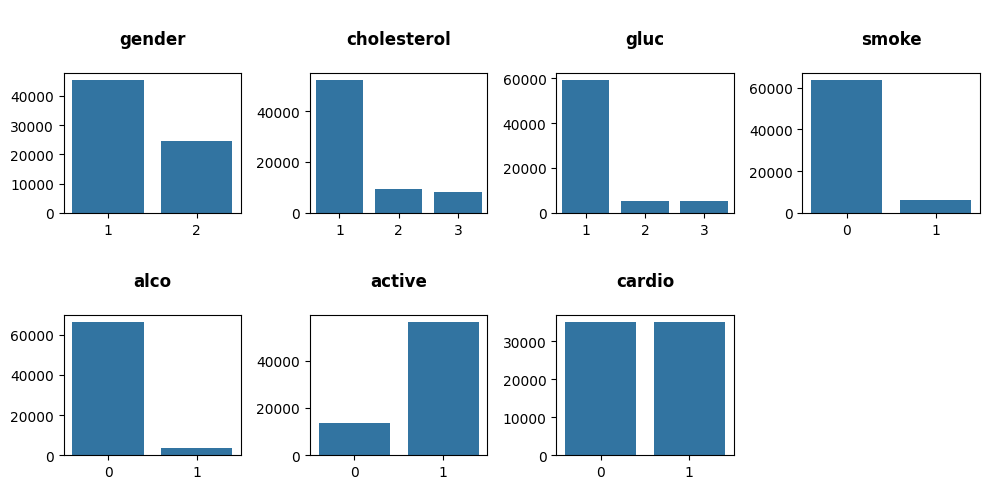

In [7]:
ce.countplots(df, categorical_cols)

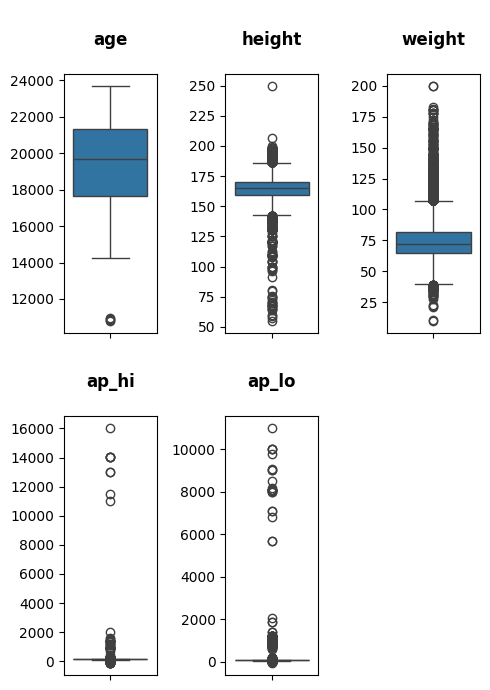

In [8]:
ce.boxplots(df, numeric_cols)

<Axes: >

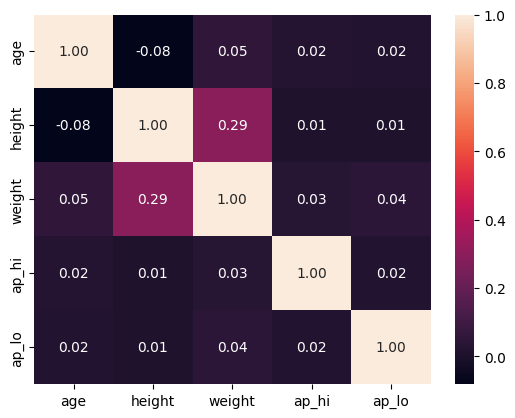

In [9]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

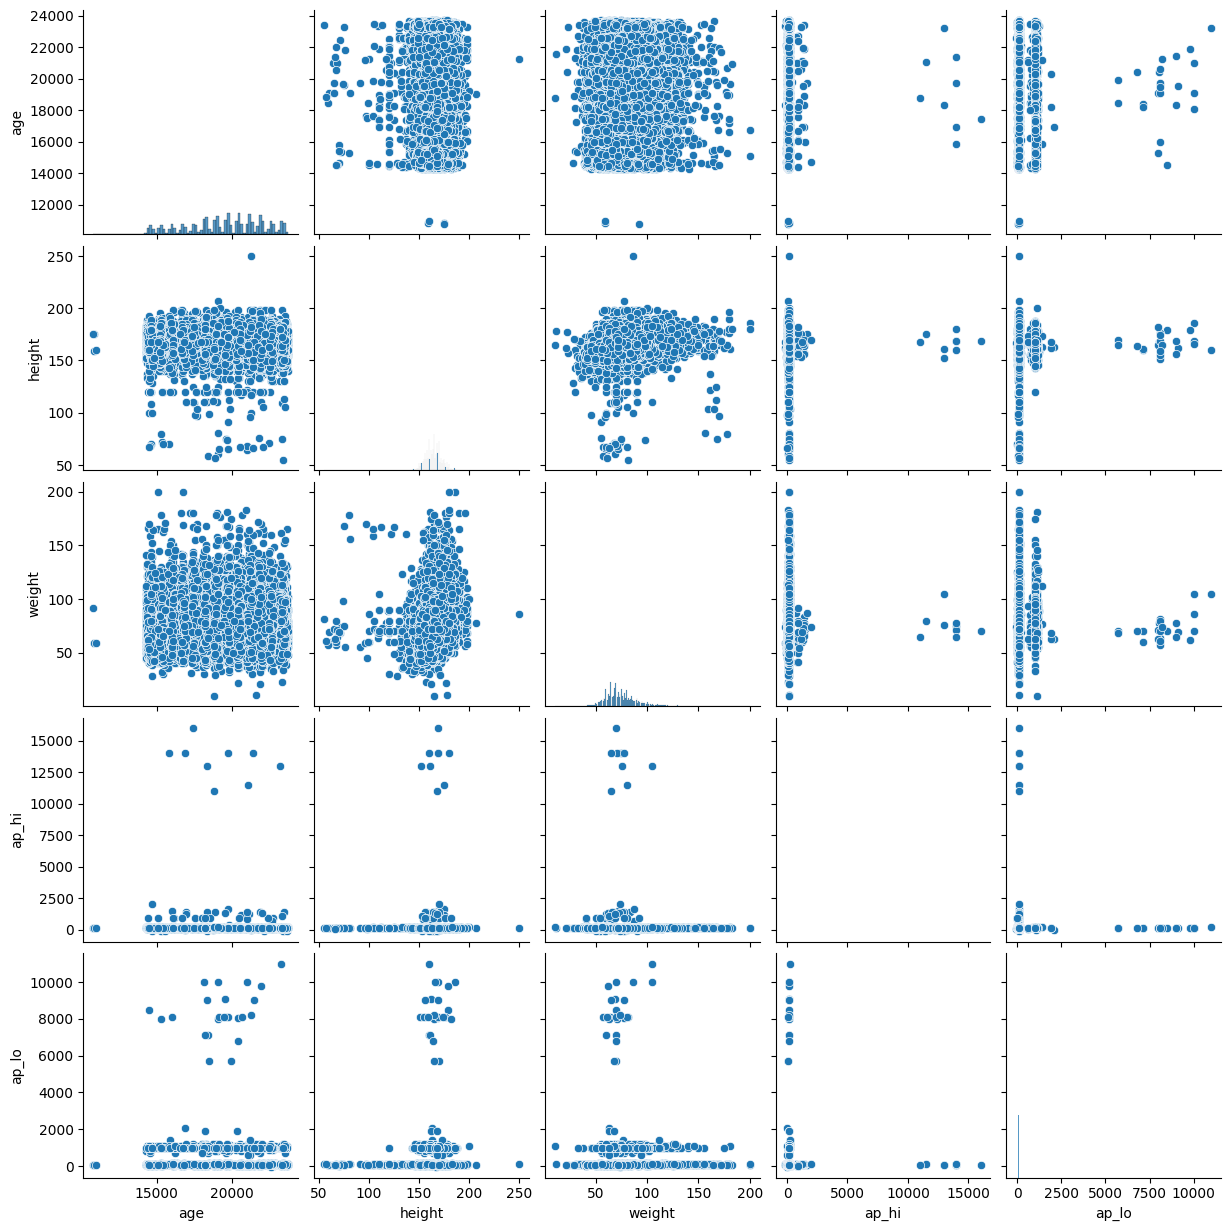

In [12]:
sns.pairplot(df[numeric_cols])

# Preprocessing

~N

Systolic Blood Pressure  
- Minimum (Min): 70 mm Hg  
- 25th Percentile: 110 mm Hg  
- 50th Percentile: 120 mm Hg  
- 75th Percentile: 130 mm Hg  
- Maximum (Max): 180 mm Hg  

Diastolic Blood Pressure  
- Minimum (Min): 40 mm Hg  
- 25th Percentile: 70 mm Hg  
- 50th Percentile: 80 mm Hg  
- 75th Percentile: 90 mm Hg  
- Maximum (Max): 120 mm Hg  

*Source: Brave AI*